# Practica de Visualización

Un dataset de NOAA está almacenado en el archivo `data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. Este es el dataset que utilizaremos para la práctica.

Nota: Los datos para esta práctica forman parte de un dataset perteneciente a The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones de la superficie terrestre en todo el mundo.

Cada fila en el archivo de datos corresponde a una sola observación.

Nos proporciona las siguientes variables:

- **id** : código de identificación de la estación
- **date** : fecha en formato YYYY-MM-DD (por ejemplo: 2012-01-24 = 24 de enero de 2012)
- **element** : indica el tipo de medición
    - **TMAX** : Temperatura máxima
    - **TMIN** : Temperatura mínima
- **value**: valor de la temperatura (en décimas de grados centígrados)

## Indicaciones

1. Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.
2. Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.
3. Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.
4. ¡Haz que la imagen sea agradable! Considera problemas como leyendas, etiquetas y líneas en demasía.

Los datos proporcionados están cerca de **Ann Arbor, Michigan, Estados Unidos**.

## Comparativa de temperaturas desde 2005 al 2014 y los extremos de temperatura en el año 2015
#### Tal como lo pide la consigna, en la grafica encontramos las temperaturas del año 2015 en comparación con los récords históricos registrados entre 2005 y 2014. Representando el rango de temperaturas mínimas y máximas como un área sombreada, y marqué los días en los que 2015 rompió esos límites, ya sea por temperaturas más altas o más bajas. ¿Que se puede ver en ella? En esta visualización me permite explicar de forma clara cuándo y cuánto se desviaron las temperaturas de ese año respecto al comportamiento esperado, esto podría ser interesante de analizar en caso de tener un negocio tenga una gran correlación con el cambio de temperaturas, como es en el caso de Salto, las termas del Dayman aunque los datos en este caso sean de otro lugar. Además, puede servir como base para analizar posibles eventos climáticos extremos, patrones anómalos (con valores atipicos) o incluso iniciar una conversación sobre el impacto del cambio climático en la región evaluada.

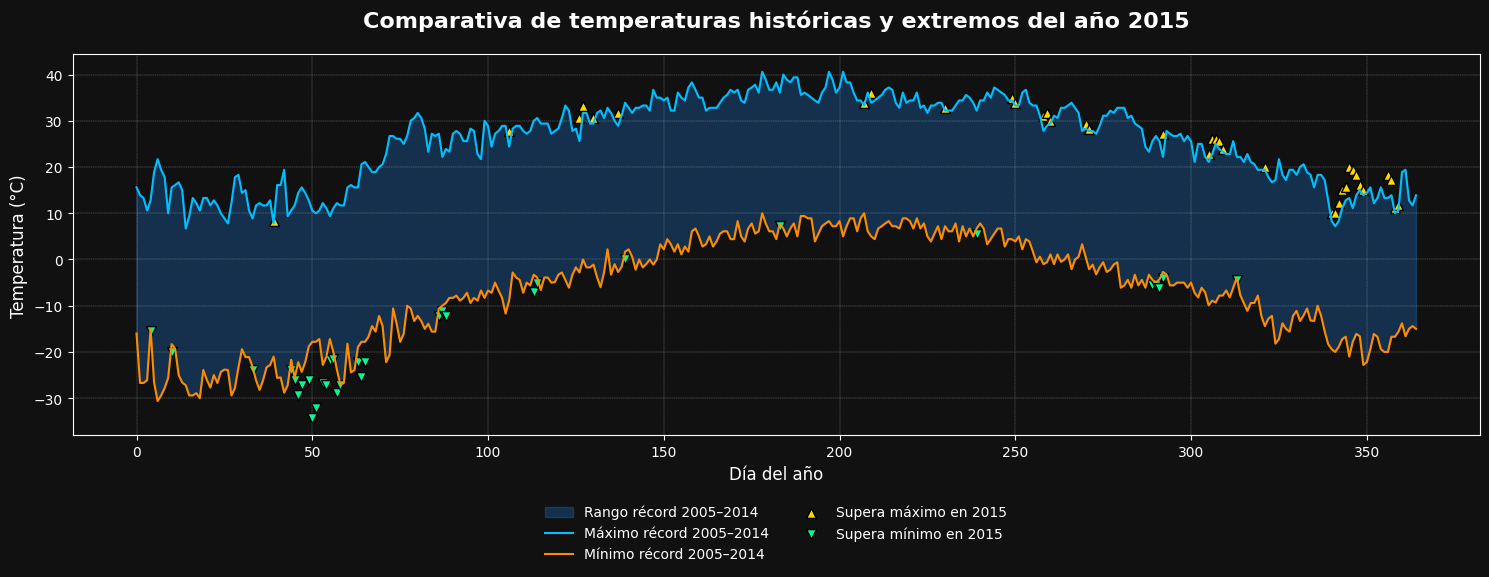

In [11]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

CSV_PATH = Path("../data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")

def cargar_noaa(ruta_csv: Path) -> pd.DataFrame:
    df = pd.read_csv(ruta_csv)
    df.columns = [c.lower() for c in df.columns]
    value_col = "data_value" if "data_value" in df.columns else "value"
    df["date"] = pd.to_datetime(df["date"])
    df["year"] = df["date"].dt.year
    df["month_day"] = df["date"].dt.strftime("%m-%d")
    df = df[df["month_day"] != "02-29"]
    df["valor_c"] = df[value_col] / 10
    return df

def calcular_record_2005_2014(df: pd.DataFrame) -> pd.DataFrame:
    df_2005_14 = df[(df["year"] >= 2005) & (df["year"] <= 2014)]
    maximos = df_2005_14[df_2005_14["element"] == "TMAX"].groupby("month_day")["valor_c"].max()
    minimos = df_2005_14[df_2005_14["element"] == "TMIN"].groupby("month_day")["valor_c"].min()
    return pd.DataFrame({
        "max_2005_2014": maximos.values,
        "min_2005_2014": minimos.values,
    })

def extraer_extremos_2015(df: pd.DataFrame) -> pd.DataFrame:
    df_2015 = df[df["year"] == 2015]
    maximos = df_2015[df_2015["element"] == "TMAX"].groupby("month_day")["valor_c"].max()
    minimos = df_2015[df_2015["element"] == "TMIN"].groupby("month_day")["valor_c"].min()
    return pd.DataFrame({
        "max_2015": maximos.values,
        "min_2015": minimos.values,
    })

def graficar_récords_noaa(
    records: pd.DataFrame,
    extremos_2015: pd.DataFrame,
    mostrar: bool = True,
    ruta_guardado: Path = None,
) -> None:

    dias = range(len(records))
    fig, ax = plt.subplots(figsize=(15, 6))
    plt.style.use("dark_background")

    color_max = "#00BFFF"
    color_min = "#FF8C00"
    color_area = "#1E90FF"
    color_breaker_max = "#FFD700"
    color_breaker_min = "#00FA9A"

    ax.set_facecolor("#111111")
    fig.patch.set_facecolor("#111111")

    ax.fill_between(dias, records["min_2005_2014"], records["max_2005_2014"],
                    color=color_area, alpha=0.25, label="Rango récord 2005–2014")

    ax.plot(dias, records["max_2005_2014"], color=color_max, label="Máximo récord 2005–2014")
    ax.plot(dias, records["min_2005_2014"], color=color_min, label="Mínimo récord 2005–2014")

    mask_max = extremos_2015["max_2015"] > records["max_2005_2014"]
    ax.scatter(
        [i for i in dias if mask_max.iloc[i]],
        extremos_2015["max_2015"][mask_max],
        color=color_breaker_max, edgecolor="black", marker="^", s=50,
        label="Supera máximo en 2015"
    )

    mask_min = extremos_2015["min_2015"] < records["min_2005_2014"]
    ax.scatter(
        [i for i in dias if mask_min.iloc[i]],
        extremos_2015["min_2015"][mask_min],
        color=color_breaker_min, edgecolor="black", marker="v", s=50,
        label="Supera mínimo en 2015"
    )

    ax.set_title("Comparativa de temperaturas históricas y extremos del año 2015", fontsize=16, weight='bold', pad=20)
    ax.set_xlabel("Día del año", fontsize=12)
    ax.set_ylabel("Temperatura (°C)", fontsize=12)
    ax.grid(True, linestyle="--", linewidth=0.3, alpha=0.5)

    ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=10, frameon=False)

    plt.rcParams["font.family"] = "sans-serif"
    plt.rcParams["font.size"] = 10

    plt.tight_layout()

    if ruta_guardado:
        plt.savefig(ruta_guardado, dpi=300, bbox_inches="tight")
    if mostrar:
        plt.show()

def main():
    df = cargar_noaa(CSV_PATH)
    records = calcular_record_2005_2014(df)
    extremos_2015 = extraer_extremos_2015(df)

    graficar_récords_noaa(
        records=records,
        extremos_2015=extremos_2015,
        mostrar=True,
    )

if __name__ == "__main__":
    main()
